Давайте выведем формулы для дисперсии и смещения.
Ответ для дисперсии:

$E_xE_X[a(x, X) - E_X[a(x, X)]]^2$

Для смещения:

$E_x(f(x) - E_X[a(x, X)])^2$

где x - какой-то тест, X - тренировочная выборка. a(x, X) - решение на x тесте при обучении на тестовой выборке X, E_x - матожидание по тестам, E_X - матожидание по обучающей выборке.

Вывод:

На одном объекте функция потерь равна $MSE = (y(x) - a(x))^2$. Но нужно рассматривать на более общих понятиях, чем один объект. $a$ также должно зависеть от обучающей выборки и таргет y зависит от шума, поэтому оценкой будет:
$E_xE_XE_{\epsilon}[y(x, ϵ) - a(x, X)]^2$

$$E_XE_{ϵ}[y(x, ϵ) - a(x, X)]^2 = E_XE_{ϵ}[f(x) + ϵ - a(x, X)]^2 =$$ 
$$= E_XE_{ϵ}[(f(x) - a(x, X))^2 + 2ϵ(f(x) - a(x, X)) + ϵ^2] = $$
$$= E_X[(f(x) - a(x, X))^2] + 2E_ϵ[ϵ]*E_X[f(x) - a(x, X)] + E_ϵϵ^2 = $$
$$= E_X[(f(x) - a(x, X))^2] + σ^2$$

$\sigma^2$ - шум

$$E_X[(f(x) - a(x, X))^2] = $$
$ = ${прибавим и вычтем $E_X[a(x, X)]$}$ = $ 
$$= E_X[(f(x) + E_X[a(x, X)] - E_X[a(x, X)] - a(x, X))^2] = $$
$$= E_X[(f(x) - E_X[a(x, X)])^2] + E_X[(a(x, X) - E_X[a(x, X)])^2] + 2E_X[(f(x) - E_X[a(x, X)])(E_X[a(x, X)] - a(x, X))] = $$
$$= (f(x) - E_X[a(x, X)])^2 + E_X[(a(x, X) - E_X[a(x, X)])^2] + 2(f(x) - E_X[a(x, X)])(E_X[a(x, X)] - E_X[a(x, X)]) = $$
$$= (f(x) - E_X[a(x, X)])^2 + E_X[(a(x, X) - E_X[a(x, X)])^2]$$

Вернемся к формуле:

$E_xE_XE_{\epsilon}[y(x, ϵ) - a(x, X)]^2 = E_x(f(x) - E_X[a(x, X)])^2 + E_xE_X[(a(x, X) - E_X[a(x, X)])^2] + \sigma^2$

Первое слагаемое - смещение, второе - дисперсия, третье - шум.
Найдем дисперсию.

Теперь по алгоритму. Как это можно реализовать? Будем при фиксированном количестве признаков фиксировать тестовую выборку и создавать новые и новые тренировочные выборки а потом брать среднее. Так можно найти $E_X$. Потом просто возьмем среднее по этой тестовой выборке (матожидание по тесту, т.е. E_x)

#Вспомогательные функции и классы

##Датасет

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def make_dataset(num_elements = 50, noise = True):
    #Пока не будем менять константы, если будет нужно, модернизируем функцию
    a = 20
    b = 3 
    c = 4

    x0 = 1
    y0 = 2
    z0 = 3

    norm = np.array([a, b, c])
    point = np.array([x0, y0, z0])
    #Получим d
    d = -point.dot(norm)
    #Построим точки для плоскости

    left_border_plane = -100
    right_border_plane = 100

    x = np.linspace(left_border_plane, right_border_plane, num_elements)
    y = np.linspace(left_border_plane, right_border_plane, num_elements)

    X, Y = np.meshgrid(x, y)

    Z = (-a * X - b * Y - d) * 1. / c

    #Растянем наши матрицы в одномерный массив
    x_data = X.ravel()
    y_data = Y.ravel()
    z_data = Z.ravel()

    n = num_elements * num_elements
    #Добавим шума
    if noise:
      x_data = x_data + 5 * np.random.randn(n)
      y_data = y_data + 5 * np.random.randn(n)
      z_data = z_data + np.random.randn(n)

    #Составим матрицу признаков
    data = pd.DataFrame({'x' : x_data, 'y' : y_data, 'z' : z_data})
    #Перемешаем данные (можно этого и не делать, потому что далее train_test_split все перемешает, но на всякий случаем сделаем)
    data = data.sample(frac = 1)
    #Разделим выборку на признаки и таргет
    Fich = data.iloc[ : , : -1]
    target = data['z']
    return Fich, target, left_border_plane, right_border_plane

## Класс аналитического решения

In [31]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        n, k = X.shape
        X_ = X
        #Не забудем про фиктивный признак равный 1
        if self.fit_intercept:
            X_ = np.hstack((X, np.ones((n, 1))))
        self.w = np.linalg.pinv(X_.T @ X_) @ (X_.T @ y)
        return self
        
    def predict(self, X):
        n, k = X.shape
        #Не забудем про фиктивный признак равный 1
        X_ = X
        if self.fit_intercept:
            X_ = np.hstack((X, np.ones((n, 1))))

        y_pred = X_ @ self.w

        return y_pred
    #функция возвращающая веса
    def get_weights(self):
        return self.w
        

## Вспомогательная функция

In [32]:
import numpy as np
import pandas as pd
def make_range(arr):
  '''arr:
  array of [left, right, step]
  '''
  ans = []
  for new in arr:
    for i in range(new[0], new[1] - new[2], new[2]):
      ans.append([i, new[2]])
  return ans

In [33]:
#Немного модифицируем нашу функцию. Теперь она также будет возвращать веса в нужном режиме работы (mode)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

def MSE_and_weights(Fich_original, target_original, iters = None, step = 1, rand_size = 1, lr = 0.01, max_iter = 1000, ret = 0, regressor_type = 0, left_border = 0, right_border = 1000):  
  '''
  ret:
  (0) MSE and weights returned
  (1) only MSE returned
  (2) only weights returned
  '''
  
  '''
  regressor_type:
  (0) analitic
  (1) gradient descent
  (2) stochastic gradient descent
  '''

  Fich_copy = Fich_original.copy()
  target = target_original.copy()

  n, _ = Fich_copy.shape

  weights = []
  inter = []
  MSE_train = []
  MSE_test = []
  num_iter = []
  variance_arr = []
  bias_arr = []

  if iters == None:
    iters = []
    for i in range(left_border, right_border, step):
      iters.append([i, step])

  if left_border > 0:
    new_elem = rand_size * np.random.randn(n, left_border)
    names = [str(i) for i in range(left_border)]
    df = pd.DataFrame(new_elem, columns=names, index=range(n))
    Fich = pd.concat([Fich, df], axis=1)
  
  number_pr = 0
  for i, step in tqdm(iters):
      number_pr += 1
      if number_pr > 2:
        #Генерируем новые столбцы
        new_elem = rand_size * np.random.randn(n, step)
        names = [str(k) for k in range(i, i + step)]
        df = pd.DataFrame(new_elem, columns=names, index=range(n))
        Fich = pd.concat([Fich, df], axis=1)
      else:
        if number_pr == 1:
          Fich = pd.DataFrame(Fich_copy['x'])
        else:
          Fich = Fich_copy
      #Начинаем обучение
      X_train, X_test, target_train, target_test = train_test_split(Fich.to_numpy(), target.to_numpy(), test_size=0.3)
      
      #type of regressor
      if regressor_type == 0:
          regressor = MyLinearRegression()
      elif regressor_type == 1:
          regressor = MyGradientLinearRegression()
      else:
          regressor = MySGDLinearRegression()
      
      #fit
      if regressor_type == 0:
          regressor.fit(X_train, target_train)
      else:
          regressor.fit(X_train, target_train, lr = lr, max_iter = max_iter)
      
      train_predictions = regressor.predict(X_train)
      test_predictions = regressor.predict(X_test)
      
      MSE_train.append(mean_squared_error(target_train, train_predictions))
      MSE_test.append(mean_squared_error(target_test, test_predictions))
      tmp = regressor.get_weights()
      weights.append(tmp[:-1])
      inter.append(tmp[-1])
      num_iter.append(X_train.shape[1])



      #let's find variance
      col = X_train.shape[1] - 2
      num_var_iter = 10
      num_elements = 20
      mid = None
      first_var = True
      for zzz in range(num_var_iter):
          Fich_var, target_var, _, _ = make_dataset(num_elements)
          Fich_var_copy = Fich_var.copy()
          if number_pr > 2:
            #Генерируем новые столбцы
            new_elem = rand_size * np.random.randn(n, col)
            names = [str(k) for k in range(col)]
            df = pd.DataFrame(new_elem, columns=names, index=range(n))
            Fich_var = pd.concat([Fich_var, df], axis=1)
          else:
            if number_pr == 1:
              Fich_var = pd.DataFrame(Fich_var_copy['x'])
            else:
              Fich = Fich_var_copy
          X_train, _ , target_train, _ = train_test_split(Fich_var.to_numpy(), target_var.to_numpy(), test_size=0.3)
          #type of regressor
          regressor = MyLinearRegression()
          
          #fit
          if regressor_type == 0:
              regressor.fit(X_train, target_train)
          else:
              regressor.fit(X_train, target_train, lr = lr, max_iter = max_iter)

          test_predictions = regressor.predict(X_test)
          if first_var:
              mid = test_predictions
              first_var = False
          else:
              mid += test_predictions
      mid /= num_var_iter
      variance = None
      first_var = True
      for zzz in range(num_var_iter):
          Fich_var, target_var, _, _ = make_dataset(num_elements)
          Fich_var_copy = Fich_var.copy()
          if number_pr > 2:
            #Генерируем новые столбцы
            new_elem = rand_size * np.random.randn(n, col)
            names = [str(k) for k in range(col)]
            df = pd.DataFrame(new_elem, columns=names, index=range(n))
            Fich_var = pd.concat([Fich_var, df], axis=1)
          else:
            if number_pr == 1:
              Fich_var = pd.DataFrame(Fich_var_copy['x'])
            else:
              Fich = Fich_var_copy
          X_train, _ , target_train, _ = train_test_split(Fich_var.to_numpy(), target_var.to_numpy(), test_size=0.3)
          #type of regressor
          
          regressor = MyLinearRegression()
          
          #fit
          if regressor_type == 0:
              regressor.fit(X_train, target_train)
          else:
              regressor.fit(X_train, target_train, lr = lr, max_iter = max_iter)
          
          test_predictions = regressor.predict(X_test)
          if first_var:
              variance = (test_predictions - mid) * (test_predictions - mid)
              first_var = False
          else:
              variance += (test_predictions - mid) * (test_predictions - mid)
      variance /= num_var_iter
      variance_arr.append(variance.mean())

      
  if ret == 0:
    return MSE_train, MSE_test, weights, inter, num_iter, variance_arr
  elif ret == 1:
    return MSE_train, MSE_test, num_iter, variance_arr
  else:
    return weights, inter, num_iter, variance_arr

#Исследование

In [34]:
#Объявим нужные переменные

import warnings
warnings.filterwarnings("ignore")

num_elements = 20
Fich, target, left_border_plane, right_border_plane = make_dataset(num_elements)
rand_size = (right_border_plane - left_border_plane) // 2

n = round(num_elements * num_elements * 0.7)
iters = [[0, 1000, 10]]
iters = make_range(iters)

In [35]:
#analitic
MSE_train, MSE_test, weights, inter, num_iter, variance = MSE_and_weights(Fich, target, rand_size = rand_size, iters=iters, regressor_type = 0)
#Найдем норму
norm_analitic = []
for w in weights:
  norm_analitic.append(np.linalg.norm(w))

answers_analitic = [MSE_train, MSE_test, weights, inter, num_iter, variance]

  0%|          | 0/99 [00:00<?, ?it/s]

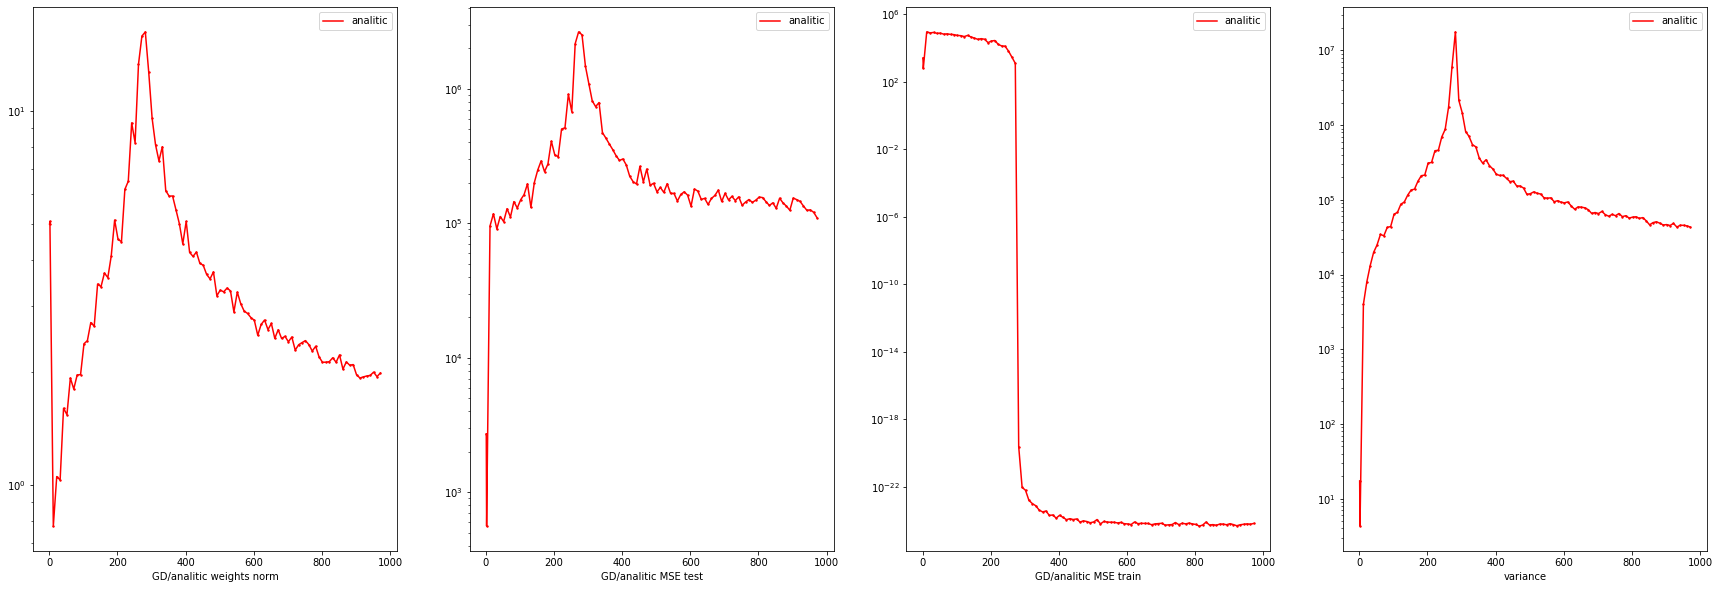

In [36]:
#Нарисуем график
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))
ax[0].scatter(answers_analitic[4], norm_analitic, color='red', s = 2)
ax[0].plot(answers_analitic[4], norm_analitic, color='red', label='analitic')
ax[0].set(xlabel = 'GD/analitic weights norm')
ax[0].set_yscale('log')
ax[0].legend()


ax[1].scatter(answers_analitic[4], answers_analitic[1], color = 'red', s = 2)
ax[1].plot(answers_analitic[4], answers_analitic[1], color = 'red', label='analitic')
ax[1].set(xlabel = 'GD/analitic MSE test')
ax[1].legend()
ax[1].set_yscale('log')

ax[2].scatter(answers_analitic[4], answers_analitic[0], color = 'red', s = 2)
ax[2].plot(answers_analitic[4], answers_analitic[0], color = 'red', label='analitic')
ax[2].set(xlabel = 'GD/analitic MSE train')
ax[2].legend()
ax[2].set_yscale('log')

ax[3].scatter(answers_analitic[4], answers_analitic[5], color = 'red', s = 2)
ax[3].plot(answers_analitic[4], answers_analitic[5], color = 'red', label='analitic')
ax[3].set(xlabel = 'variance')
ax[3].legend()
ax[3].set_yscale('log')
plt.show()

Можно посмотреть в приближении к нулю (где информативные признаки). Для решения задачи нужно 2 информативных признака, но обучение происходило на 1 признаке, на 2 признаках, а далее +10 (12, 22, и тд)

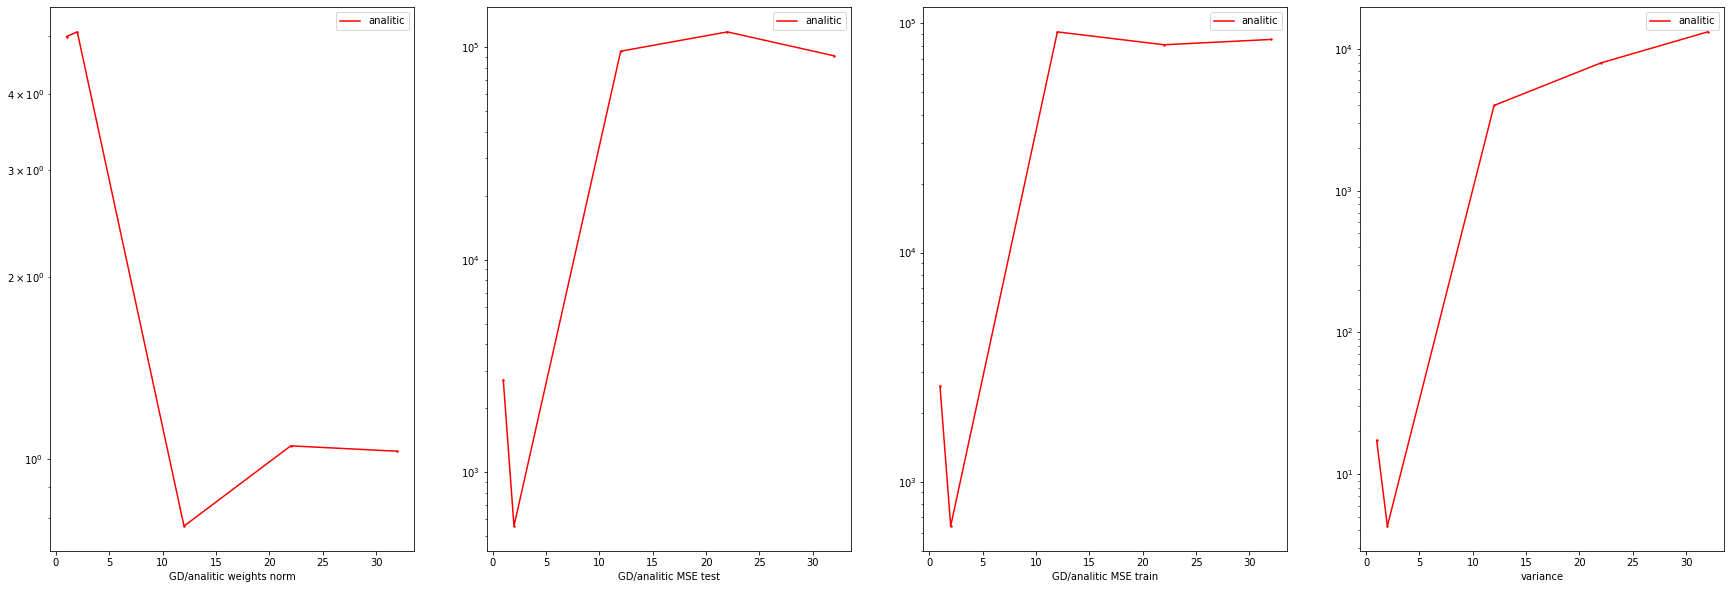

In [37]:
num = 5
answers_analitic = [answers_analitic[0][:num], answers_analitic[1][:num], answers_analitic[2][:num], answers_analitic[3][:num], answers_analitic[4][:num], answers_analitic[5][:num]]
norm_analitic = norm_analitic[:num]
#Нарисуем график
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))
ax[0].scatter(answers_analitic[4], norm_analitic, color='red', s = 2)
ax[0].plot(answers_analitic[4], norm_analitic, color='red', label='analitic')
ax[0].set(xlabel = 'GD/analitic weights norm')
ax[0].set_yscale('log')
ax[0].legend()


ax[1].scatter(answers_analitic[4], answers_analitic[1], color = 'red', s = 2)
ax[1].plot(answers_analitic[4], answers_analitic[1], color = 'red', label='analitic')
ax[1].set(xlabel = 'GD/analitic MSE test')
ax[1].legend()
ax[1].set_yscale('log')

ax[2].scatter(answers_analitic[4], answers_analitic[0], color = 'red', s = 2)
ax[2].plot(answers_analitic[4], answers_analitic[0], color = 'red', label='analitic')
ax[2].set(xlabel = 'GD/analitic MSE train')
ax[2].legend()
ax[2].set_yscale('log')

ax[3].scatter(answers_analitic[4], answers_analitic[5], color = 'red', s = 2)
ax[3].plot(answers_analitic[4], answers_analitic[5], color = 'red', label='analitic')
ax[3].set(xlabel = 'variance')
ax[3].legend()
ax[3].set_yscale('log')
plt.show()